Using matplotlib backend: Qt5Agg
0.1478858
0.008994929
0.007633246
0.007011192
0.0065480727
0.006172122
0.005823248
0.0055098664
0.00521065
0.0049330685
0.0046577267
0.0043761595
0.004127769
0.003931058
0.0037605048
0.0036210113
0.0034932608
0.003394943
0.0033114976
0.0032410352


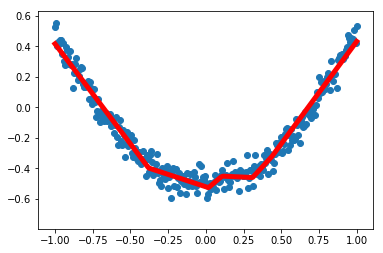

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
# 展示在网页中
# %matplotlib inline   
# 弹出展示的对话框，将最后结果展示到页面中，或%matplotlib auto
%matplotlib

def add_layer(inputs, in_size, out_size, activation_function=None):  # 默认激活函数为线性函数
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))  # in_size行，out_size列的随机数矩阵
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)   # 推荐biases不为0
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# 数据
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# 定义传入值
xs = tf.placeholder(tf.float32, [None,1])  # None表示无论输入多少个样例都可以，1表示x_data属性的维度
ys = tf.placeholder(tf.float32, [None,1])

# 输入层（1个属性，1个神经元），隐藏层（10个神经元），输出层（1个属性，1个神经元）
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)   # 隐藏层
prediction = add_layer(l1, 10, 1, activation_function=None)   # 输出层

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))# 损失，求均值（求和（（真实值-预测值）平方））
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)  # 优化器以0.1的学习率减小loss

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# 绘图
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)           # 绘制真实数据图
# plt.show()   # 展示一次暂停
plt.ion()   # 连续展示图片，不暂停
# plt.show(block=False)

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})  # 用全部的数据来运算
    if i%50==0:
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        # 先抹除上一条线，第一次时没有上一条线，则异常跳过
        try:
            ax.lines.remove(lines[0])    # 绘制第下一条线时，抹除上一条线，否则线条叠加密密麻麻
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)   # 绘制红线，宽度为5，为训练50步时的预测结果曲线
        plt.pause(0.2)   # 绘制完成时，暂停0.2秒